In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()

In [3]:
X = data.data
Y = data.target

print('X shape', X.shape, '\nY shape', Y.shape)

X shape (569, 30) 
Y shape (569,)


In [4]:
m, n = X.shape

In [5]:
X = X.T
Y = Y.reshape(1, Y.shape[0])

print('X shape', X.shape, '\nY shape', Y.shape)

X shape (30, 569) 
Y shape (1, 569)


In [6]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    return 1 / (1 + np.exp(-z))

In [7]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    return np.zeros(shape=(dim, 1)), 0

In [8]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (dims, 1)
    b -- bias, a scalar
    X -- data of size (dims, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    
    m = X.shape[1]

    A = sigmoid( np.dot(w.T, X) + b )
    cost = -1 / m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))

    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [9]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (dims, 1)
    b -- bias, a scalar
    X -- data of shape (dims, number of examples)
    Y -- true "label" vector  of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

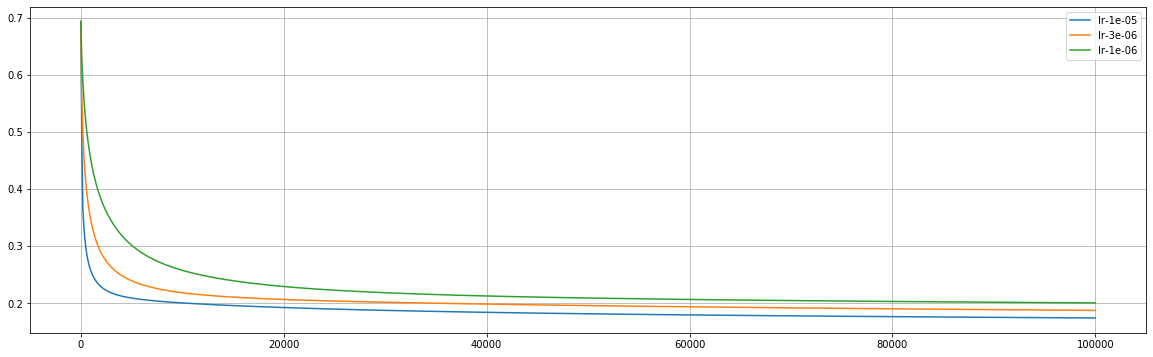

In [12]:
n_iters = 100001

fig, ax = plt.subplots(figsize=(20, 6))

for lr in [0.00001, 0.000003, 0.000001]:

    w, b = initialize_with_zeros(X.shape[0])
    params, grads, costs = optimize(w, b, X, Y, num_iterations=n_iters, learning_rate=lr, print_cost=False)

    ax.plot(np.arange(1, n_iters+1, 100), costs, label=f'lr-{lr}')

ax.legend()
ax.grid()

In [11]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (dims, 1)
    b -- bias, a scalar
    X -- data of size (dims, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b) 
    
    for i in range(A.shape[1]):
        Y_prediction[:, i] = (A[:, i] > 0.5) * 1
    
    return Y_prediction